In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tqdm import tqdm_notebook, tqdm
import warnings
import random
import matplotlib.pyplot as plt
import seaborn as sns

import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
import lightgbm as lgb
from xgboost import XGBRegressor

warnings.simplefilter('ignore')
warnings.filterwarnings("ignore")


# تم اختبار  اربعة نماذج للتبؤ :

LightGBM و Random Forest و CatBoost و XGBoost


# معالجة البيانات
التعامل مع القيم المفقودة:

1-  سيتم ملء القيم المفقودة بطريقة تقليدية.

2-  سيتم تجربة طرق مبتكرة أكثر لملء هذه القيم بهدف تحسين جودة البيانات وتأثيرها على أداء النماذج.


# إضافة المميزات (Features):

سيتم تطوير مجموعة من المميزات الجديدة  وإضافتها إلى البيانات.

بعد ذلك، سيتم اختبار تأثير هذه الميزات على أداء النماذج المختلفة لمعرفة مدى فائدتها.



# تقسيم البيانات  :
سيتم تقسيم البيانات إلى مجموعة تدريب ومجموعة تحقق بطريقتين مختلفتين:

تقسيم عادي عشوائي.

تقسيم يعتمد على البُعد الزمني (time-based split).



In [2]:

train = pd.read_csv(r"C:\Users\ASUS\Downloads\london-house-price-prediction-advanced-techniques\train.csv")
test = pd.read_csv(r'C:\Users\ASUS\Downloads\london-house-price-prediction-advanced-techniques\test.csv')
sample_submission = pd.read_csv(r'C:\Users\ASUS\Downloads\london-house-price-prediction-advanced-techniques\sample_submission.csv')


print("Step 1 complete: Data loaded")
print(f"Train shape: {train.shape}, Test shape: {test.shape}")

Step 1 complete: Data loaded
Train shape: (266325, 17), Test shape: (16547, 16)


<table>
  <thead>
    <tr>
      <th>العمود</th>
      <th>الوصف</th>
    </tr>
  </thead>
  <tbody>
    <tr><td><b>ID</b></td><td>معرّف فريد لكل صف   </td></tr>
    <tr><td><b>fullAddress</b></td><td>العنوان الكامل للعقار (شارع، مدينة، رمز بريدي)</td></tr>
    <tr><td><b>postcode</b></td><td>الرمز البريدي للعقار</td></tr>
    <tr><td><b>country</b></td><td>كلهن ( England)</td></tr>
    <tr><td><b>outcode</b></td><td>الجزء الخارجي من الرمز البريدي الذي يشير للمنطقة  </td></tr>
    <tr><td><b>latitude</b></td><td>خط العرض الجغرافي للعقار</td></tr>
    <tr><td><b>longitude</b></td><td>خط الطول الجغرافي للعقار</td></tr>
    <tr><td><b>bathrooms</b></td><td>عدد الحمامات في العقار </td></tr>
    <tr><td><b>bedrooms</b></td><td>عدد غرف النوم</td></tr>
    <tr><td><b>floorAreaSqM</b></td><td>مساحة العقار بالمتر المربع</td></tr>
    <tr><td><b>livingRooms</b></td><td>عدد غرف الصالون </td></tr>
    <tr><td><b>tenure</b></td><td>نوع التملك </td></tr>
    <tr><td><b>propertyType</b></td><td>نوع العقار (مثل: شقة، بيت منفصل،)</td></tr>
    <tr><td><b>currentEnergyRating</b></td><td>تصنيف كفاءة الطاقة  للعقار </td></tr>
    <tr><td><b>sale_month</b></td><td>شهر البيع (1-12)</td></tr>
    <tr><td><b>sale_year</b></td><td>سنة البيع</td></tr>
    <tr><td><b>price</b></td><td>سعر بيع العقاري </td></tr>
  </tbody>
</table>


In [7]:
train.head()

,ID,fullAddress,postcode,country,outcode,latitude,longitude,bathrooms,bedrooms,floorAreaSqM,livingRooms,tenure,propertyType,currentEnergyRating,sale_month,sale_year,price
0,0,"38 Adelina Grove, London, E1 3AD",E1 3AD,England,E1,51.519406,-0.053261,NaN,3.0,80.0,1.0,Freehold,Semi-Detached House,C,1,1995,77000
1,1,"6 Cleveland Grove, London, E1 4XL",E1 4XL,England,E1,51.521261,-0.053384,2.0,4.0,110.0,1.0,Leasehold,Terrace Property,D,1,1995,89995
2,2,"65 Sanderstead Road, London, E10 7PW",E10 7PW,England,E10,51.569054,-0.034892,1.0,3.0,84.0,1.0,Freehold,Terrace Property,D,1,1995,59000
3,3,"5 Queenswood Gardens, London, E11 3SE",E11 3SE,England,E11,51.564212,0.026292,NaN,2.0,72.0,1.0,Leasehold,Purpose Built Flat,NaN,1,1995,51500
4,4,"12 Woodlands Road, London, E11 4RW",E11 4RW,England,E11,51.563430,0.006260,1.0,3.0,104.0,1.0,Freehold,Mid Terrace House,D,1,1995,63500


# تحضير البيانات:


<p>قمنا بتحويل قيم تصنيف الطاقة إلى أرقام مرتبة <strong>في نفس العمود</strong> لأن التصنيفات  لها ترتيب طبيعي من الأفضل إلى الأسوأ.

فلا مانع ان يكون هنالك تراتبية كأرقام

In [ ]:
# لين 
train['currentEnergyRating'].value_counts(dropna=False)
energy_order = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}
train['energy_num'] = train['currentEnergyRating'].map(energy_order)
test['energy_num'] = train['currentEnergyRating'].map(energy_order)


# month_index:

الفكرة: تحويل السنة والشهر لقيمة عددية مستمرة تمثل ترتيب كل شهر في الزمن بدءًا من أول شهر موجود بالداتا.


حتى يساعد الموديل يفهم التتابع الزمني ويراقب الاتجاهات والتغييرات عبر الزمن بشكل خطي.

# month_sin و month_cos:

الفكرة: تحويل قيمة الشهر (من 1 إلى 12) لدالتين جيبيتان 


 لأن الأشهر دورية، يعني ديسمبر  يلي يليه يناير،  ازا استخدمنا الشهر كرقم عادي الموديل ممكن يشوفها متباعدة (12 و1 بعيدة).



# المخططات التالية توضح المقصود واهميته

In [ ]:
# هبة
train['month_index'] = (train['sale_year'] - train['sale_year'].min()) * 12 + (train['sale_month'] - train['sale_month'].min())

train['month_sin'] = np.sin(2 * np.pi * train['sale_month'] / 12)
train['month_cos'] = np.cos(2 * np.pi * train['sale_month'] / 12)



test['month_index'] = (train['sale_year'] - train['sale_year'].min()) * 12 + (train['sale_month'] - train['sale_month'].min())

test['month_sin'] = np.sin(2 * np.pi * test['sale_month'] / 12)
test['month_cos'] = np.cos(2 * np.pi * test['sale_month'] / 12)

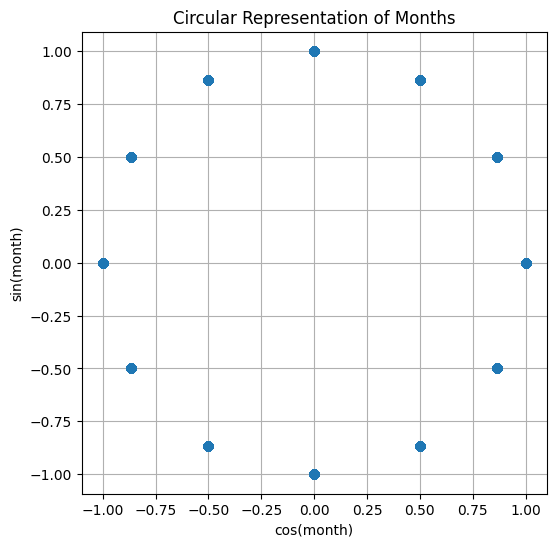

In [5]:
plt.figure(figsize=(6,6))
plt.plot(train['month_cos'], train['month_sin'], 'o', alpha=0.5)
plt.xlabel("cos(month)")
plt.ylabel("sin(month)")
plt.title("Circular Representation of Months")
plt.grid(True)
plt.axis('equal')
plt.show()

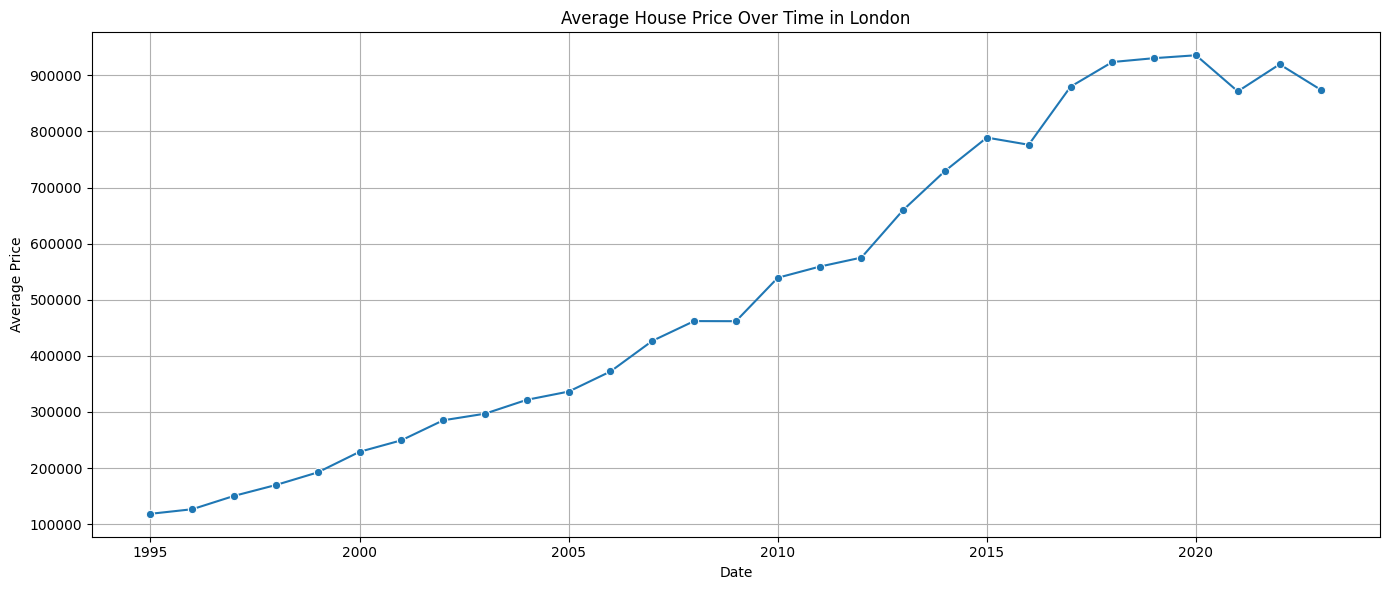

In [6]:
monthly_prices = train.groupby('sale_year')['price'].mean().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_prices, x='sale_year', y='price', marker='o')
plt.title('Average House Price Over Time in London')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.grid(True)
plt.tight_layout()
plt.show()




# avg_price_outcode :
بيمثل متوسط سعر البيوت في منطقة معينة .

بيعطي إشارة قوية عن المستوى السعري المحلي للمنطقة، لأن السعر في مناطق معينة عادة يكون متشابه.

بيساعد الموديل يفهم التأثير الجغرافي على السعر.


# sales_volume_outcode :
بيعكس مدى نشاط السوق في المنطقة، كم عدد البيوت المبِيعة أو المعروضة.

مناطق فيها مبيعات عالية قد تشير لسوق نشط أو طلب عالي، وهذا ممكن يؤثر على السعر.



In [ ]:
# هبة
avg_price_by_outcode = train.groupby('outcode')['price'].mean()

# ربط متوسط السعر مع بيانات التدريب
train['avg_price_outcode'] = train['outcode'].map(avg_price_by_outcode)

# حساب حجم المبيعات لكل outcode في بيانات التدريب
sales_volume_by_outcode = train.groupby('outcode').size()
train['sales_volume_outcode'] = train['outcode'].map(sales_volume_by_outcode)

# ربط حجم المبيعات مع بيانات الاختبار حسب outcode (حسب تكرار كل outcode في بيانات الاختبار نفسها)
test['sales_volume_outcode'] = test['outcode'].map(test['outcode'].value_counts())

# ربط متوسط السعر المحسوب من بيانات التدريب مع بيانات الاختبار
test['avg_price_outcode'] = test['outcode'].map(avg_price_by_outcode)



# تعبئة القيم الفارغة:


  <h3>تعويض غرف النوم بطريقة  تعتمد على السعر والمساحة</h3>




In [ ]:
# لين
def fill_bedrooms_conditional_with_propertyType(df):
    df = df.copy()

    prop_groups = {}
    known_prop = df[df['bedrooms'].notna() & df['propertyType'].notna()]
    for prop_type, group in known_prop.groupby('propertyType'):
        prop_groups[prop_type] = group[['price', 'floorAreaSqM', 'bedrooms']].values

    known_no_prop = df[df['bedrooms'].notna() & df['propertyType'].isna()][['price', 'floorAreaSqM', 'bedrooms']].values

    missing_idx = df[df['bedrooms'].isna()].index

    for idx in missing_idx:
        price = df.loc[idx, 'price']
        area = df.loc[idx, 'floorAreaSqM']
        prop_type = df.loc[idx, 'propertyType']

        if pd.notna(prop_type) and prop_type in prop_groups:
            known_data = prop_groups[prop_type]
        else:
            known_data = known_no_prop

        if len(known_data) == 0:
            continue  
        distances = np.linalg.norm(known_data[:, :2] - np.array([price, area]), axis=1)
        closest_idx = np.argmin(distances)

        df.at[idx, 'bedrooms'] = known_data[closest_idx, 2]

    return df

train_filled_smart = fill_bedrooms_conditional_with_propertyType(train)
print("عدد القيم الناقصة بعد التعويض:", train_filled_smart['bedrooms'].isna().sum())


عدد القيم الناقصة بعد التعويض: 0


<div>
  <h3>تعويض  لقيم الحمامات الناقصة</h3>
  <ul>
    <li>يتم البحث عن أقرب عقار معروف داخل نفس نوع شقة  بناءً على ثلاثة عوامل:</li>
    <ul>
      <li>السعر</li>
      <li>عدد غرف النوم</li>
      <li>المساحة</li>
    </ul>
    <li>إذا وُجد عقار مشابه، يتم نسخ عدد الحمامات منه مع التأكد من أنه لا يتجاوز عدد غرف النوم + 2، للحفاظ على المنطقية.</li>
   
  </ul>
</div>


In [ ]:
 # لين
def fill_bathrooms_smart_with_propertyType(df):
    df = df.copy()

    # مجموعات حسب propertyType مع قيم معروفة للحمامات
    prop_groups = {}
    known_prop = df[df['bathrooms'].notna() & df['propertyType'].notna()]
    for prop_type, group in known_prop.groupby('propertyType'):
        prop_groups[prop_type] = group[['price', 'bedrooms', 'floorAreaSqM', 'bathrooms']].values

    # بيانات معروفة بدون propertyType (نعوّض منها لمن propertyType مفقودة)
    known_no_prop = df[df['bathrooms'].notna() & df['propertyType'].isna()][['price', 'bedrooms', 'floorAreaSqM', 'bathrooms']].values

    missing_idx = df[df['bathrooms'].isna()].index

    for idx in missing_idx:
        price = df.loc[idx, 'price']
        bedrooms = df.loc[idx, 'bedrooms']
        area = df.loc[idx, 'floorAreaSqM']
        prop_type = df.loc[idx, 'propertyType']

        if pd.notna(prop_type) and prop_type in prop_groups:
            known_data = prop_groups[prop_type]
        else:
            known_data = known_no_prop

        if len(known_data) == 0:
            continue  # ما في بيانات نعوض منها

        distances = np.linalg.norm(known_data[:, :3] - np.array([price, bedrooms, area]), axis=1)
        closest_idx = np.argmin(distances)

        candidate_bathrooms = known_data[closest_idx, 3]

        max_bathrooms_allowed = bedrooms + 2

        filled_bathrooms = min(candidate_bathrooms, max_bathrooms_allowed)

        df.at[idx, 'bathrooms'] = filled_bathrooms

    return df

train_filled_bathrooms = fill_bathrooms_smart_with_propertyType(train_filled_smart)
print("عدد القيم الناقصة بعد تعويض الحمامات:", train_filled_bathrooms['bathrooms'].isna().sum())


عدد القيم الناقصة بعد تعويض الحمامات: 0


<div>
  <h3>تعويض  لقيم غرف المعيشة المفقودة</h3>
  <ul>
    <li>نستخدم سعر العقار، عدد غرف النوم، ومساحة الأرض لتقدير أقرب حالة مشابهة.</li>
    <li>البحث يتم ضمن نفس نوع شقة   .</li>
   

  </ul>
</div>

In [ ]:
# لين
def fill_livingRooms_smart_with_propertyType(df):
    df = df.copy()

    # مجموعات حسب propertyType مع بيانات معروف فيها livingRooms
    prop_groups = {}
    known_prop = df[df['livingRooms'].notna() & df['propertyType'].notna()]
    for prop_type, group in known_prop.groupby('propertyType'):
        prop_groups[prop_type] = group[['price', 'bedrooms', 'floorAreaSqM', 'livingRooms']].values

    # بيانات معروفة بدون propertyType لتعويض لمن propertyType مفقودة
    known_no_prop = df[df['livingRooms'].notna() & df['propertyType'].isna()][['price', 'bedrooms', 'floorAreaSqM', 'livingRooms']].values

    missing_idx = df[df['livingRooms'].isna()].index

    for idx in missing_idx:
        price = df.loc[idx, 'price']
        bedrooms = df.loc[idx, 'bedrooms']
        area = df.loc[idx, 'floorAreaSqM']
        prop_type = df.loc[idx, 'propertyType']

        if pd.notna(prop_type) and prop_type in prop_groups:
            known_data = prop_groups[prop_type]
        else:
            known_data = known_no_prop

        if len(known_data) == 0:
            continue

        distances = np.linalg.norm(known_data[:, :3] - np.array([price, bedrooms, area]), axis=1)
        closest_idx = np.argmin(distances)

        predicted_living_rooms = known_data[closest_idx, 3]

        df.at[idx, 'livingRooms'] = predicted_living_rooms

    return df

train_filled_all = fill_livingRooms_smart_with_propertyType(train_filled_bathrooms)

print("عدد القيم الناقصة بعد تعويض الصالونات:", train_filled_all['livingRooms'].isna().sum())


عدد القيم الناقصة بعد تعويض الصالونات: 0


##   تعويض القيم المفقودة لمساحة العقار  
  يتم البحث عن أقرب عقار مشابه بناءً على الخصائص التالية:

- عدد غرف النوم 
- عدد الحمامات 
- عدد غرف المعيشة 
- سعر العقار 




In [ ]:
 # لين
def fill_floor_area_smart(df):
    df = df.copy()

    # بيانات معروفة ومتكاملة
    known_data = df[
        df['floorAreaSqM'].notna() &
        df['bedrooms'].notna() &
        df['bathrooms'].notna() &
        df['livingRooms'].notna() &
        df['price'].notna()
    ][['bedrooms', 'bathrooms', 'livingRooms', 'price', 'floorAreaSqM']].values

    missing_idx = df[df['floorAreaSqM'].isna()].index

    for idx in missing_idx:
        bedrooms = df.loc[idx, 'bedrooms']
        bathrooms = df.loc[idx, 'bathrooms']
        livingRooms = df.loc[idx, 'livingRooms']
        price = df.loc[idx, 'price']

        # إذا أي وحدة من الخصائص ناقصة، ما فينا نعوض
        if pd.isna(bedrooms) or pd.isna(bathrooms) or pd.isna(livingRooms) or pd.isna(price):
            continue

        if len(known_data) == 0:
            break  # ما في بيانات نعوض منها

        # حساب المسافة بناءً على الخصائص الأربع
        distances = np.linalg.norm(known_data[:, :4] - np.array([bedrooms, bathrooms, livingRooms, price]), axis=1)
        closest_idx = np.argmin(distances)

        df.at[idx, 'floorAreaSqM'] = known_data[closest_idx, 4]

    return df
train_filled = fill_floor_area_smart(train_filled_all)
print("عدد القيم الناقصة بعد التعويض:", train_filled['floorAreaSqM'].isna().sum())


عدد القيم الناقصة بعد التعويض: 0


سيتم تعويض القيم الباقية بطريقة العادية

In [ ]:
train_filled.isna().sum()

ID                         0
fullAddress                0
postcode                   0
country                    0
outcode                    0
latitude                   0
longitude                  0
bathrooms                  0
bedrooms                   0
floorAreaSqM               0
livingRooms                0
tenure                  5721
propertyType             508
currentEnergyRating    56814
sale_month                 0
sale_year                  0
price                      0
energy_num             56814
month_index                0
month_sin                  0
month_cos                  0
dtype: int64

In [12]:
for col in train_filled.columns:

    missing = train_filled[col].isnull().sum()

    if missing > len(train) * 0.5:
        train_filled_area = train_filled.drop(columns=[col])

    elif missing > 0:

        if train_filled[col].dtype == object:
            train_filled[col] = train_filled[col].fillna(train_filled[col].mode()[0])

        else:
            train_filled[col] = train_filled[col].fillna(train_filled[col].median())

طريقة التعويض العادية:


In [ ]:
# هناء
train_filled2=train
for col in train_filled2.columns:

    missing = train_filled2[col].isnull().sum()

    if missing > len(train) * 0.5:
        train_filled2 = train_filled2.drop(columns=[col])

    elif missing > 0:

        if train_filled2[col].dtype == object:
            train_filled2[col] = train_filled2[col].fillna(train_filled2[col].mode()[0])

        else:
            train_filled2[col] = train_filled2[col].fillna(train_filled2[col].median())

In [ ]:
test.isna().sum()

ID                        0
fullAddress               0
postcode                  0
country                   0
outcode                   0
latitude                  0
longitude                 0
bathrooms              2624
bedrooms               1375
floorAreaSqM           2006
livingRooms            2095
tenure                  590
propertyType            167
currentEnergyRating    1497
sale_month                0
sale_year                 0
energy_num             3671
month_index               0
month_sin                 0
month_cos                 0
dtype: int64

In [ ]:
# هناء
for col in test.columns:

    missing = test[col].isnull().sum()

  
    if missing > len(test) * 0.5:
        test = test.drop(columns=[col])

  
    elif missing > 0:

        if test[col].dtype == object:
            test[col] = test[col].fillna(test[col].mode()[0])  

        else:
            test[col] = test[col].fillna(test[col].median())  

 # تقسيم البيانات حسب الزمن:

 تم استخدام لوغريتم للسعر لتقليل تاثير قيم شاذة

In [ ]:
# هبة
train_filledT = train_filled.sort_values(by='sale_year').reset_index(drop=True)
train_dataT = train_filledT[train_filledT['sale_year'] < 2023]
val_dataT = train_filledT[train_filledT['sale_year'] >= 2023]
X_trainT = train_dataT.drop(columns=['ID', 'price'])
Y_trainT = np.log10(train_dataT['price'])  
X_valT = val_dataT.drop(columns=['ID', 'price'])
Y_valT = np.log10(val_dataT['price']) 


In [16]:
train_filledT2 = train_filled2.sort_values(by='sale_year').reset_index(drop=True)
train_dataT2 = train_filledT2[train_filledT2['sale_year'] < 2023]
val_dataT2 = train_filledT2[train_filledT2['sale_year'] >= 2023]
X_trainT2 = train_dataT2.drop(columns=['ID', 'price'])
Y_trainT2 = np.log10(train_dataT2['price'])  
X_valT2 = val_dataT2.drop(columns=['ID', 'price'])
Y_valT2 = np.log10(val_dataT2['price']) 

# طريقة تقسيم 2:

In [ ]:
# هناء
features = train_filled.drop(columns=['ID', 'price'])
target = np.log10(train_filled['price'])


X_train, X_valid, Y_train, Y_valid = train_test_split(
    features,
    target,
    test_size=0.1,
    shuffle=True,
    random_state=42
)



features2 = train_filled2.drop(columns=['ID', 'price'])
target2 = np.log10(train_filled2['price'])


X_train2, X_valid2, Y_train2, Y_valid2 = train_test_split(
    features2,
    target2,
    test_size=0.1,
    shuffle=True,
    random_state=42
)

# التدريب:

# Ranodm Forest:

In [46]:

# هناء

def process_split(X_train, X_valid, Y_train, Y_valid, split_name):
    
  
    X_train_model = X_train.drop(columns=['fullAddress', 'ID'], errors='ignore').copy()
    X_valid_model = X_valid.drop(columns=['fullAddress', 'ID'], errors='ignore').copy()

    
    cat_cols = X_train_model.select_dtypes(include=['object', 'category']).columns.tolist()

    for col in cat_cols:
        le = LabelEncoder()
        combined_data = pd.concat([X_train_model[col], X_valid_model[col]], axis=0).astype(str)
        le.fit(combined_data)

        X_train_model[col] = le.transform(X_train_model[col].astype(str))
        X_valid_model[col] = le.transform(X_valid_model[col].astype(str))

   
    model = RandomForestRegressor(
        n_estimators=500,
        max_depth=10,
        random_state=42,
        n_jobs=-1
    )

  
    model.fit(X_train_model, Y_train)

   
    y_train_pred = model.predict(X_train_model)
    y_valid_pred = model.predict(X_valid_model)

   
    def evaluate(y_true, y_pred):
        mae = mean_absolute_error(y_true, y_pred)
        mse = mean_squared_error(y_true, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_true, y_pred)
        mape = mean_absolute_percentage_error(y_true, y_pred)
        return {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2, 'MAPE': mape}

    # حساب المؤشرات
    train_metrics = evaluate(Y_train, y_train_pred)
    valid_metrics = evaluate(Y_valid, y_valid_pred)

 
    df_results = pd.DataFrame([train_metrics, valid_metrics], index=[f'{split_name}_Train', f'{split_name}_Validation'])

    return df_results,model


results_list = []
res1, model1 = process_split(X_trainT, X_valT, Y_trainT, Y_valT, 'تقسيم الزمن - تعبئة أولى')
results_list.append(res1)


res2, _ = process_split(X_trainT2, X_valT2, Y_trainT2, Y_valT2, 'تقسيم الزمن - تعبئة ثانية')
results_list.append(res2)

res3, _ = process_split(X_train, X_valid, Y_train, Y_valid, 'تقسيم عشوائي - تعبئة أولى')
results_list.append(res3)

res4, _ = process_split(X_train2, X_valid2, Y_train2, Y_valid2, 'تقسيم عشوائي - تعبئة ثانية')

final_results = pd.concat(results_list)


In [ ]:

final_results = pd.concat(results_list)
final_results = final_results[['MAE', 'MSE', 'RMSE', 'R2', 'MAPE']].round(4)
final_results['MAPE'] = (final_results['MAPE'] * 100).round(2).astype(str) + '%'
print("\n====== تقييم أداء النموذج على جميع التقسيمات ======\n")
print(final_results.to_string())



====== تقييم أداء النموذج على جميع التقسيمات ======

                                                                         MAE     MSE    RMSE      R2   MAPE
تقسيم حسب الزمن و داتا معبئة بطريقة الاولى_Train                      0.1101  0.0273  0.1652  0.8338   2.0%
تقسيم حسب الزمن و داتا معبئة بطريقة الاولى_Validation                 0.1178  0.0325  0.1804  0.6659  2.05%
تقسيم حسب الزمن و داتا معبئة بطريقة الثانية العادية_Train             0.1114  0.0286  0.1690  0.8260  2.03%
تقسيم حسب الزمن و داتا معبئة بطريقة الثانية العادية_Validation        0.1179  0.0334  0.1827  0.6575  2.05%
تقسيم الداتا بالطريقة العادية وداتا معبئة بطريقة الاولى_Train         0.1107  0.0279  0.1669  0.8286   2.0%
تقسيم الداتا بالطريقة العادية وداتا معبئة بطريقة الاولى_Validation    0.1128  0.0288  0.1698  0.8216  2.04%
تقسيم الداتا بالطريقة العادية و داتا معبئة بطريقة العادية_Train       0.1115  0.0289  0.1701  0.8219  2.02%
تقسيم الداتا بالطريقة العادية و داتا معبئة بطريقة العادية_Validation  0.1128  0.02

# lightGBM :

In [52]:
# هناء
def process_lgb_split(X_train, X_valid, Y_train, Y_valid, split_name):
    
    # تحضير نسخة من البيانات بدون أعمدة غير مفيدة
    X_train_model = X_train.drop(columns=['fullAddress', 'ID'], errors='ignore').copy()
    X_valid_model = X_valid.drop(columns=['fullAddress', 'ID'], errors='ignore').copy()

    # ترميز الأعمدة الفئوية
    cat_cols = X_train_model.select_dtypes(include=['object', 'category']).columns.tolist()

    for col in cat_cols:
        le = LabelEncoder()
        combined_data = pd.concat([X_train_model[col], X_valid_model[col]], axis=0).astype(str)
        le.fit(combined_data)

        X_train_model[col] = le.transform(X_train_model[col].astype(str))
        X_valid_model[col] = le.transform(X_valid_model[col].astype(str))

    # إنشاء نموذج LightGBM
    model = lgb.LGBMRegressor(
        n_estimators=4096,
        learning_rate=0.08,
        max_depth=8,
        reg_lambda=0.6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
    )

    # تدريب الموديل
    model.fit(
        X_train_model, Y_train,
        eval_set=[(X_valid_model, Y_valid)],
        categorical_feature=cat_cols,
   
    )

    # التنبؤ
    y_train_pred = model.predict(X_train_model)
    y_valid_pred = model.predict(X_valid_model)

    # دالة التقييم
    def evaluate(y_true, y_pred):
        mae = mean_absolute_error(y_true, y_pred)
        mse = mean_squared_error(y_true, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_true, y_pred)
        mape = mean_absolute_percentage_error(y_true, y_pred)
        return {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2, 'MAPE': mape}

    # التقييم
    train_metrics = evaluate(Y_train, y_train_pred)
    valid_metrics = evaluate(Y_valid, y_valid_pred)

    # جدول النتائج
    df_results = pd.DataFrame([train_metrics, valid_metrics], index=[f'{split_name}_Train', f'{split_name}_Validation'])

    return df_results,model


results_listlg = []
res1, model1 = process_lgb_split(X_trainT, X_valT, Y_trainT, Y_valT, 'تقسيم الزمن - تعبئة أولى')
results_listlg.append(res1)


res2, _ = process_lgb_split(X_trainT2, X_valT2, Y_trainT2, Y_valT2, 'تقسيم الزمن - تعبئة ثانية')
results_listlg.append(res2)

res3, _ = process_lgb_split(X_train, X_valid, Y_train, Y_valid, 'تقسيم عشوائي - تعبئة أولى')
results_listlg.append(res3)

res4, _ = process_lgb_split(X_train2, X_valid2, Y_train2, Y_valid2, 'تقسيم عشوائي - تعبئة ثانية')
results_listlg.append(res4)

final_resultslg = pd.concat(results_listlg)



[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010531 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 26362
[LightGBM] [Info] Number of data points in the train set: 232916, number of used features: 19
[LightGBM] [Info] Start training from score 5.545524
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008752 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 263

In [53]:

final_resultslg = final_resultslg[['MAE', 'MSE', 'RMSE', 'R2', 'MAPE']].round(4)
final_resultslg['MAPE'] = (final_resultslg['MAPE'] * 100).round(2).astype(str) + '%'
print("\n====== تقييم أداء النموذج على جميع التقسيمات ======\n")
print(final_resultslg.to_string())



====== تقييم أداء النموذج على جميع التقسيمات ======

                                          MAE     MSE    RMSE      R2   MAPE
تقسيم الزمن - تعبئة أولى_Train         0.0650  0.0115  0.1073  0.9298  1.19%
تقسيم الزمن - تعبئة أولى_Validation    0.0934  0.0246  0.1570  0.7471  1.64%
تقسيم الزمن - تعبئة ثانية_Train        0.0651  0.0120  0.1094  0.9271  1.19%
تقسيم الزمن - تعبئة ثانية_Validation   0.0916  0.0244  0.1562  0.7497  1.61%
تقسيم عشوائي - تعبئة أولى_Train        0.0663  0.0121  0.1100  0.9256  1.21%
تقسيم عشوائي - تعبئة أولى_Validation   0.0813  0.0189  0.1376  0.8829  1.48%
تقسيم عشوائي - تعبئة ثانية_Train       0.0664  0.0125  0.1118  0.9231  1.21%
تقسيم عشوائي - تعبئة ثانية_Validation  0.0804  0.0188  0.1371  0.8838  1.46%


# XGBRegressor

In [ ]:
# هبة 

def process_xgb_split(X_train, X_valid, Y_train, Y_valid, split_name):
    
    # تحضير نسخة من البيانات بدون أعمدة غير مفيدة
    X_train_model = X_train.drop(columns=['fullAddress', 'ID'], errors='ignore').copy()
    X_valid_model = X_valid.drop(columns=['fullAddress', 'ID'], errors='ignore').copy()

    # ترميز الأعمدة الفئوية
    cat_cols = X_train_model.select_dtypes(include=['object', 'category']).columns.tolist()

    for col in cat_cols:
        le = LabelEncoder()
        combined_data = pd.concat([X_train_model[col], X_valid_model[col]], axis=0).astype(str)
        le.fit(combined_data)

        X_train_model[col] = le.transform(X_train_model[col].astype(str))
        X_valid_model[col] = le.transform(X_valid_model[col].astype(str))

    
    model = XGBRegressor(
        n_estimators=2000,
        learning_rate=0.05,
        max_depth=8,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_lambda=1,
        random_state=42,
        tree_method='gpu_hist'  # إذا عندك GPU
    )

    # تدريب النموذج
    model.fit(
        X_train_model, Y_train,
        eval_set=[(X_valid_model, Y_valid)],
        verbose=False
    )

 
    y_train_pred = model.predict(X_train_model)
    y_valid_pred = model.predict(X_valid_model)

  
    def evaluate(y_true, y_pred):
        mae = mean_absolute_error(y_true, y_pred)
        mse = mean_squared_error(y_true, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_true, y_pred)
        mape = mean_absolute_percentage_error(y_true, y_pred)
        return {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2, 'MAPE': mape}

    # التقييم
    train_metrics = evaluate(Y_train, y_train_pred)
    valid_metrics = evaluate(Y_valid, y_valid_pred)

 
    df_results = pd.DataFrame([train_metrics, valid_metrics], index=[f'{split_name}_Train', f'{split_name}_Validation'])

    return df_results,model
results_listx = []
res1, model1 = process_xgb_split(X_trainT, X_valT, Y_trainT, Y_valT, 'تقسيم الزمن - تعبئة أولى')
results_listx.append(res1)


res2, _ = process_xgb_split(X_trainT2, X_valT2, Y_trainT2, Y_valT2, 'تقسيم الزمن - تعبئة ثانية')
results_listx.append(res2)

res3, _ = process_xgb_split(X_train, X_valid, Y_train, Y_valid, 'تقسيم عشوائي - تعبئة أولى')
results_listx.append(res3)

res4, _ = process_xgb_split(X_train2, X_valid2, Y_train2, Y_valid2, 'تقسيم عشوائي - تعبئة ثانية')
results_listx.append(res4)

final_resultx = pd.concat(results_listx)


In [55]:

final_resultx = final_resultx[['MAE', 'MSE', 'RMSE', 'R2', 'MAPE']].round(4)
final_resultx['MAPE'] = (final_resultx['MAPE'] * 100).round(2).astype(str) + '%'
print("\n====== تقييم أداء النموذج على جميع التقسيمات ======\n")
print(final_resultx.to_string())



====== تقييم أداء النموذج على جميع التقسيمات ======

                                          MAE     MSE    RMSE      R2   MAPE
تقسيم الزمن - تعبئة أولى_Train         0.0574  0.0078  0.0883  0.9525  1.05%
تقسيم الزمن - تعبئة أولى_Validation    0.0912  0.0239  0.1544  0.7552   1.6%
تقسيم الزمن - تعبئة ثانية_Train        0.0575  0.0081  0.0898  0.9509  1.05%
تقسيم الزمن - تعبئة ثانية_Validation   0.0908  0.0239  0.1545  0.7551  1.59%
تقسيم عشوائي - تعبئة أولى_Train        0.0584  0.0081  0.0902  0.9499  1.06%
تقسيم عشوائي - تعبئة أولى_Validation   0.0796  0.0186  0.1364  0.8848  1.45%
تقسيم عشوائي - تعبئة ثانية_Train       0.0585  0.0084  0.0917  0.9482  1.07%
تقسيم عشوائي - تعبئة ثانية_Validation  0.0789  0.0184  0.1357  0.8861  1.43%


# CatBoostRegressor :

In [ ]:
# لين

def process_catboost_split(X_train, X_valid, Y_train, Y_valid, split_name, seed=927):
    
    X_train_model = X_train.drop(columns=['ID'], errors='ignore').copy()
    X_valid_model = X_valid.drop(columns=['ID'], errors='ignore').copy()

    cat_features = ['postcode', 'country', 'outcode', 'tenure', 'propertyType', 'currentEnergyRating']
    text_features = ['fullAddress']

    # ترميز الميزات التصنيفية
    for col in cat_features:
        if col in X_train_model.columns:
            le = LabelEncoder()
            combined_data = pd.concat([X_train_model[col], X_valid_model[col]], axis=0).astype(str)
            le.fit(combined_data)
            X_train_model[col] = le.transform(X_train_model[col].astype(str))
            X_valid_model[col] = le.transform(X_valid_model[col].astype(str))

    # التحقق من الأعمدة النصية
    valid_text_features = []
    for col in text_features:
        if col in X_train_model.columns:
            X_train_model[col] = X_train_model[col].astype(str).fillna('').str.strip()
            X_valid_model[col] = X_valid_model[col].astype(str).fillna('').str.strip()

            total_train_non_empty = (X_train_model[col] != '').sum()
            total_valid_non_empty = (X_valid_model[col] != '').sum()

            print(f"عمود نصي '{col}': عدد القيم غير الفارغة في التدريب = {total_train_non_empty}, وفي التحقق = {total_valid_non_empty}")

            if total_train_non_empty > 0 and total_valid_non_empty > 0:
                valid_text_features.append(col)
            else:
                print(f"تحذير: العمود '{col}' يحتوي فقط على بيانات فارغة، سيتم تجاهله من النصوص.")

    # إنشاء نموذج CatBoost
    model = CatBoostRegressor(
        iterations=4096*4,
        learning_rate=0.08,
        l2_leaf_reg=0.4,
        depth=10,
        task_type='GPU',
        bagging_temperature=0.6,
        border_count=128,
        use_best_model=True,
        random_state=seed,
        verbose=100
    )

    # التدريب
    model.fit(
        X_train_model,
        Y_train,
        eval_set=(X_valid_model, Y_valid),
        cat_features=[col for col in cat_features if col in X_train_model.columns],
        text_features=valid_text_features,
        early_stopping_rounds=128
    )

    # التنبؤ
    y_train_pred = model.predict(X_train_model)
    y_valid_pred = model.predict(X_valid_model)

    # التقييم
    def evaluate(y_true, y_pred):
        mae = mean_absolute_error(y_true, y_pred)
        mse = mean_squared_error(y_true, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_true, y_pred)
        mape = mean_absolute_percentage_error(y_true, y_pred)
        return {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2, 'MAPE': mape}

    train_metrics = evaluate(Y_train, y_train_pred)
    valid_metrics = evaluate(Y_valid, y_valid_pred)

    df_results = pd.DataFrame([train_metrics, valid_metrics], index=[f'{split_name}_Train', f'{split_name}_Validation'])

    return df_results, model


results_list_cat = []

res1, model1 = process_catboost_split(X_trainT, X_valT, Y_trainT, Y_valT, 'تقسيم الزمن - تعبئة أولى')
results_list_cat.append(res1)

res2,model2 = process_catboost_split(X_trainT2, X_valT2, Y_trainT2, Y_valT2, 'تقسيم الزمن - تعبئة ثانية')
results_list_cat.append(res2)

res3, model3 = process_catboost_split(X_train, X_valid, Y_train, Y_valid, 'تقسيم عشوائي - تعبئة أولى')
results_list_cat.append(res3)

res4,model4 = process_catboost_split(X_train2, X_valid2, Y_train2, Y_valid2, 'تقسيم عشوائي - تعبئة ثانية')
results_list_cat.append(res4)

# دمج النتائج النهائية
final_results_cat = pd.concat(results_list_cat)


عمود نصي 'fullAddress': عدد القيم غير الفارغة في التدريب = 232916, وفي التحقق = 33409
0:	learn: 0.3803290	test: 0.3747754	best: 0.3747754 (0)	total: 88.2ms	remaining: 24m 5s
100:	learn: 0.1472236	test: 0.1595822	best: 0.1595822 (100)	total: 6.18s	remaining: 16m 36s
200:	learn: 0.1411358	test: 0.1563838	best: 0.1563838 (200)	total: 9.73s	remaining: 13m 3s
300:	learn: 0.1371591	test: 0.1549578	best: 0.1549540 (298)	total: 13.2s	remaining: 11m 45s
400:	learn: 0.1341334	test: 0.1538398	best: 0.1538398 (400)	total: 16.7s	remaining: 11m 6s
500:	learn: 0.1315211	test: 0.1533255	best: 0.1533255 (500)	total: 20s	remaining: 10m 35s
600:	learn: 0.1291101	test: 0.1529619	best: 0.1529422 (594)	total: 23.4s	remaining: 10m 15s
700:	learn: 0.1269281	test: 0.1525297	best: 0.1525297 (700)	total: 26.9s	remaining: 10m 2s
800:	learn: 0.1248688	test: 0.1523484	best: 0.1523484 (800)	total: 30.4s	remaining: 9m 51s
900:	learn: 0.1230473	test: 0.1521583	best: 0.1521536 (894)	total: 33.9s	remaining: 9m 42s
1000:

In [20]:

final_results_cat = final_results_cat[['MAE', 'MSE', 'RMSE', 'R2', 'MAPE']].round(4)
final_results_cat['MAPE'] = (final_results_cat['MAPE'] * 100).round(2).astype(str) + '%'
print("\n====== تقييم أداء النموذج على جميع التقسيمات ======\n")
print(final_results_cat.to_string())


====== تقييم أداء النموذج على جميع التقسيمات ======

                                          MAE     MSE    RMSE      R2   MAPE
تقسيم الزمن - تعبئة أولى_Train         0.0715  0.0122  0.1104  0.9258  1.31%
تقسيم الزمن - تعبئة أولى_Validation    0.0885  0.0227  0.1508  0.7665  1.55%
تقسيم الزمن - تعبئة ثانية_Train        0.0714  0.0124  0.1113  0.9245  1.31%
تقسيم الزمن - تعبئة ثانية_Validation   0.0874  0.0226  0.1502  0.7684  1.53%
تقسيم عشوائي - تعبئة أولى_Train        0.0639  0.0092  0.0960  0.9434  1.16%
تقسيم عشوائي - تعبئة أولى_Validation   0.0780  0.0180  0.1343  0.8884  1.42%
تقسيم عشوائي - تعبئة ثانية_Train       0.0540  0.0062  0.0790  0.9616  0.98%
تقسيم عشوائي - تعبئة ثانية_Validation  0.0752  0.0176  0.1328  0.8909  1.37%


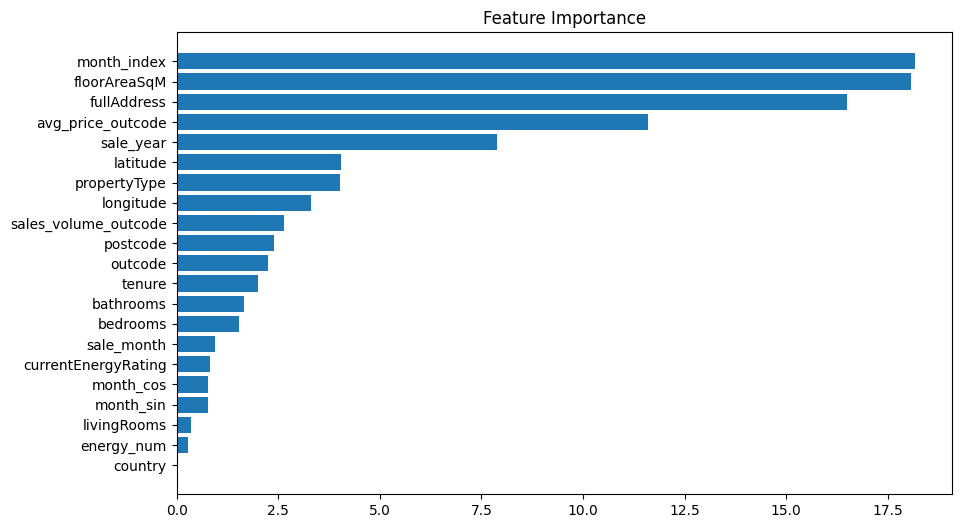

In [21]:

importances = model4.get_feature_importance(prettified=True)

# ترتيب التاثير تنازلياً
importances_sorted = importances.sort_values(by='Importances', ascending=False)

# عرض مخطط
plt.figure(figsize=(10, 6))
plt.barh(importances_sorted['Feature Id'], importances_sorted['Importances'])
plt.gca().invert_yaxis()
plt.title('Feature Importance')
plt.show()

سيتم ازالة عامود 
energy_num

country

X_train2, X_valid2, Y_train2, Y_valid2


In [22]:
# إزالة الأعمدة المطلوبة من بيانات التدريب والاختبار قبل تمريرها للدالة
X_train2 = X_train2.drop(columns=['energy_num', 'country'], errors='ignore')
X_valid2 = X_valid2.drop(columns=['energy_num', 'country'], errors='ignore')



In [43]:
def process_catboost_split(X_train, X_valid, Y_train, Y_valid, split_name, seed=927):
    
    X_train_model = X_train.drop(columns=['ID'], errors='ignore').copy()
    X_valid_model = X_valid.drop(columns=['ID'], errors='ignore').copy()

    cat_features = ['postcode','outcode', 'tenure', 'propertyType', 'currentEnergyRating','country']
    text_features = ['fullAddress']

    # ترميز الميزات التصنيفية
    for col in cat_features:
        if col in X_train_model.columns:
            le = LabelEncoder()
            combined_data = pd.concat([X_train_model[col], X_valid_model[col]], axis=0).astype(str)
            le.fit(combined_data)
            X_train_model[col] = le.transform(X_train_model[col].astype(str))
            X_valid_model[col] = le.transform(X_valid_model[col].astype(str))

    # التحقق من الأعمدة النصية
    valid_text_features = []
    for col in text_features:
        if col in X_train_model.columns:
            X_train_model[col] = X_train_model[col].astype(str).fillna('').str.strip()
            X_valid_model[col] = X_valid_model[col].astype(str).fillna('').str.strip()

            total_train_non_empty = (X_train_model[col] != '').sum()
            total_valid_non_empty = (X_valid_model[col] != '').sum()

            print(f"عمود نصي '{col}': عدد القيم غير الفارغة في التدريب = {total_train_non_empty}, وفي التحقق = {total_valid_non_empty}")

            if total_train_non_empty > 0 and total_valid_non_empty > 0:
                valid_text_features.append(col)
            else:
                print(f"تحذير: العمود '{col}' يحتوي فقط على بيانات فارغة، سيتم تجاهله من النصوص.")

    # إنشاء نموذج CatBoost
    model = CatBoostRegressor(
        iterations=4096*4,
        learning_rate=0.08,
        l2_leaf_reg=0.4,
        depth=9,
        task_type='GPU',
        bagging_temperature=0.3,
        border_count=128,
        use_best_model=True,
        random_state=seed,
        verbose=100
    )

    # التدريب
    model.fit(
        X_train_model,
        Y_train,
        eval_set=(X_valid_model, Y_valid),
        cat_features=[col for col in cat_features if col in X_train_model.columns],
        text_features=valid_text_features,
        early_stopping_rounds=128
    )

    # التنبؤ
    y_train_pred = model.predict(X_train_model)
    y_valid_pred = model.predict(X_valid_model)

    # التقييم
    def evaluate(y_true, y_pred):
        mae = mean_absolute_error(y_true, y_pred)
        mse = mean_squared_error(y_true, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_true, y_pred)
        mape = mean_absolute_percentage_error(y_true, y_pred)
        return {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2, 'MAPE': mape}

    train_metrics = evaluate(Y_train, y_train_pred)
    valid_metrics = evaluate(Y_valid, y_valid_pred)

    df_results = pd.DataFrame([train_metrics, valid_metrics], index=[f'{split_name}_Train', f'{split_name}_Validation'])

    return df_results, model


results_list_cat1 = []

res41,model41 = process_catboost_split(X_train2, X_valid2, Y_train2, Y_valid2, 'تقسيم عشوائي - تعبئة ثانية')
results_list_cat1.append(res41)


final_results_cat1 = pd.concat(results_list_cat1)


عمود نصي 'fullAddress': عدد القيم غير الفارغة في التدريب = 239692, وفي التحقق = 26633
0:	learn: 0.3792006	test: 0.3778921	best: 0.3778921 (0)	total: 194ms	remaining: 52m 54s
100:	learn: 0.1514178	test: 0.1484845	best: 0.1484845 (100)	total: 4.69s	remaining: 12m 36s
200:	learn: 0.1454164	test: 0.1443877	best: 0.1443877 (200)	total: 7.69s	remaining: 10m 18s
300:	learn: 0.1417848	test: 0.1427863	best: 0.1427863 (300)	total: 10.2s	remaining: 9m 6s
400:	learn: 0.1388902	test: 0.1416437	best: 0.1416437 (400)	total: 12.7s	remaining: 8m 24s
500:	learn: 0.1364933	test: 0.1407767	best: 0.1407767 (500)	total: 15.1s	remaining: 7m 59s
600:	learn: 0.1343671	test: 0.1400248	best: 0.1400214 (594)	total: 17.6s	remaining: 7m 41s
700:	learn: 0.1324944	test: 0.1395569	best: 0.1395569 (700)	total: 20.1s	remaining: 7m 29s
800:	learn: 0.1307524	test: 0.1392110	best: 0.1392110 (800)	total: 22.5s	remaining: 7m 17s
900:	learn: 0.1291207	test: 0.1388081	best: 0.1388081 (900)	total: 25s	remaining: 7m 10s
1000:	le


====== تقييم أداء النموذج على جميع التقسيمات ======

                                          MAE     MSE    RMSE      R2   MAPE
تقسيم عشوائي - تعبئة ثانية_Train       0.0611  0.0084  0.0915  0.9485  1.11%
تقسيم عشوائي - تعبئة ثانية_Validation  0.0766  0.0180  0.1343  0.8885  1.39%


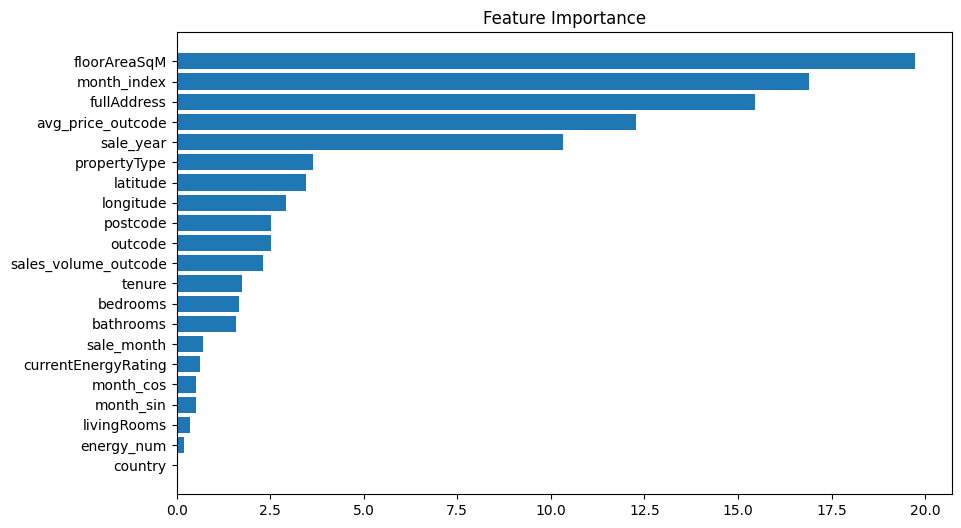

In [44]:

final_results_cat1 = final_results_cat1[['MAE', 'MSE', 'RMSE', 'R2', 'MAPE']].round(4)
final_results_cat1['MAPE'] = (final_results_cat1['MAPE'] * 100).round(2).astype(str) + '%'
print("\n====== تقييم أداء النموذج على جميع التقسيمات ======\n")
print(final_results_cat1.to_string())
importances = model41.get_feature_importance(prettified=True)

# ترتيب التاثير تنازلياً
importances_sorted = importances.sort_values(by='Importances', ascending=False)

# عرض مخطط
plt.figure(figsize=(10, 6))
plt.barh(importances_sorted['Feature Id'], importances_sorted['Importances'])
plt.gca().invert_yaxis()
plt.title('Feature Importance')
plt.show()

In [ ]:
sub =  pd.read_csv(r'C:\Users\ASUS\Downloads\london-house-price-prediction-advanced-techniques\sample_submission.csv')
sub
preds = model41.predict(test[X_train.columns.tolist()])
sub['price'] = [10 ** i for i in preds]
sub.to_csv('skut.csv', index=False)